<a href="https://colab.research.google.com/github/stewieboomhauer/SNLP_OLIDv1.0/blob/main/olidTask_snlp(SimpleTransformer_models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import pickle
import sys
import re
import os
import xml.etree.ElementTree as et
from collections import Counter
import nltk
import sklearn as sk
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from simpletransformers.classification import ClassificationModel

-------------------------------------------------------
# **1. Loading Data**
-------------------------------------------------------


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
dfs = pd.read_csv('/content/drive/MyDrive/OLIDv1.0/olid-training-v1.0.tsv', sep='\t', encoding = 'utf-8')

In [7]:
tweets = dfs["tweet"].copy()

# **2. Simple Transformers**

In [8]:
y_notoff = dfs["subtask_a"]
y = y_notoff.copy()
for i in range(len(y)):
    if y_notoff[i] == 'NOT':
        y[i] = 1
    else:
        y[i] = 0
y=y.astype('int')

In [9]:
y.to_frame()
tweets.to_frame()
data = pd.concat([tweets,y], axis=1)
data.columns = ['text', 'labels']
print(data)

                                                    text  labels
0      @USER She should ask a few native Americans wh...       0
1      @USER @USER Go home you’re drunk!!! @USER #MAG...       0
2      Amazon is investigating Chinese employees who ...       1
3      @USER Someone should'veTaken" this piece of sh...       0
4      @USER @USER Obama wanted liberals &amp; illega...       1
...                                                  ...     ...
13235  @USER Sometimes I get strong vibes from people...       0
13236  Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...       1
13237  @USER And why report this garbage.  We don't g...       0
13238                                        @USER Pussy       0
13239  #Spanishrevenge vs. #justice #HumanRights and ...       1

[13240 rows x 2 columns]


In [11]:
train_df, test_df = train_test_split(data, test_size=0.3)

In [12]:
train_df

,text,labels
4488,.@USER @USER This seems true. At least the da...,1
11137,@USER @USER People who fail to understand the ...,1
3213,@USER @USER Pope Char compares Pope Francis to...,0
1554,@USER Bono mocks nationalists during his conce...,1
10036,@USER Tom Marvollo Riddle. Evan will lose his ...,0
...,...,...
4847,@USER @USER @USER Patriachy has harmed black m...,1
5787,@USER You coming to Georgia when I get back th...,1
1465,My guess is 44 got it from those 100's of $bil...,0
10876,@USER @USER Democrats will say he shouldn't be...,1


In [15]:
dfs = dfs["tweet"].copy()

In [17]:
#Application of methods
dfs = dfs.apply(lambda x: x.replace('user', '').lower())
dfs = dfs.str.replace('[^\w\s]','')
dfs.to_frame()
dfs.columns = ['text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## 2.1 Evaluation Metrics for Transformers

In [ ]:

def evaluate_bert_model_one(model, df, label="Training", model_name="model"):
  y = df['labels'].tolist()
  y_pred, raw_outputs = model.predict(df['text'].tolist())

  print(label + ' Set')
  print("Accuracy:", accuracy_score(y, y_pred))
  print()

  print(classification_report(y, y_pred, digits=4))
  df_cm = pd.DataFrame(confusion_matrix(y, y_pred, normalize='true'), 
                       range(1,3), range(1,3))
  plt.figure(figsize=(6,4))
  ax = sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, square=True)
  ax.set_xlabel('Predicted label')
  ax.set_ylabel('True label')
  plt.savefig(model_name + "_" + label.lower() + ".png")
  plt.show()
  print()

In [ ]:
def evaluate_bert_model(model, model_name="model"):
  evaluate_bert_model_one(model, train_df, label="Training", model_name=model_name)
  evaluate_bert_model_one(model, test_df, label="Validation", model_name=model_name)
  #evaluate_bert_model_one(model, df_test, label="Testing", model_name=model_name)

## 2.2 BERT

In [ ]:
model_bert_base_cased_32 = \
ClassificationModel('bert',
                    'bert-base-cased',
                    args={"output_dir": "outputs_bert_base_cased_32/",
                          "best_model_dir": "outputs_bert_base_cased_32/best_model/",
                          "max_seq_length": 32,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
model_bert_base_cased_32.train_model(train_df)

  0%|          | 0/9268 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

(580, 0.5159556742372184)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8348079413034096

              precision    recall  f1-score   support

           0     0.8110    0.6580    0.7266      3091
           1     0.8436    0.9233    0.8817      6177

    accuracy                         0.8348      9268
   macro avg     0.8273    0.7907    0.8041      9268
weighted avg     0.8328    0.8348    0.8299      9268



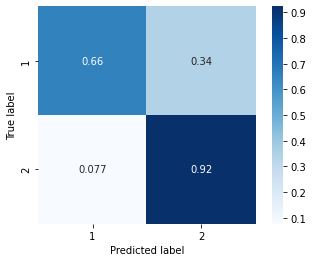

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.7953172205438066

              precision    recall  f1-score   support

           0     0.7408    0.5829    0.6524      1309
           1     0.8144    0.8997    0.8550      2663

    accuracy                         0.7953      3972
   macro avg     0.7776    0.7413    0.7537      3972
weighted avg     0.7901    0.7953    0.7882      3972



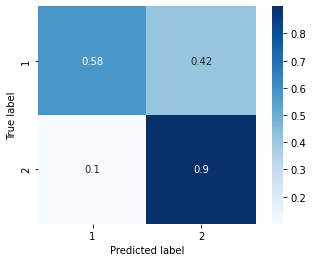

In [ ]:
evaluate_bert_model(model_bert_base_cased_32, model_name="bert_base_cased_32")

In [ ]:
model_bert_base_cased_64 = \
ClassificationModel('bert',
                    'bert-base-cased',
                    args={"output_dir": "outputs_bert_base_cased_64/",
                          "best_model_dir": "outputs_bert_base_cased_64/best_model/",
                          "max_seq_length": 64,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
model_bert_base_cased_64.train_model(train_df)

  0%|          | 0/9268 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


(580, 0.4970932360353141)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.8482952093223997

              precision    recall  f1-score   support

           0     0.7941    0.7360    0.7639      3091
           1     0.8726    0.9045    0.8882      6177

    accuracy                         0.8483      9268
   macro avg     0.8333    0.8202    0.8261      9268
weighted avg     0.8464    0.8483    0.8468      9268



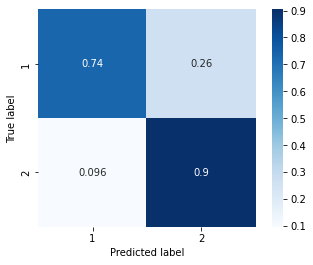

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8096676737160121

              precision    recall  f1-score   support

           0     0.7318    0.6669    0.6978      1309
           1     0.8431    0.8798    0.8611      2663

    accuracy                         0.8097      3972
   macro avg     0.7874    0.7734    0.7795      3972
weighted avg     0.8064    0.8097    0.8073      3972



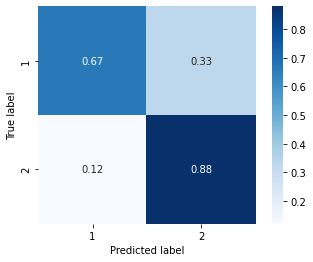

In [ ]:
evaluate_bert_model(model_bert_base_cased_64, model_name="bert_base_cased_64")

In [ ]:
model_bert_base_cased_128 = \
ClassificationModel('bert',
                    'bert-base-cased',   
                    args={"output_dir": "outputs_bert_base_cased_128/",
                          "best_model_dir": "outputs_bert_base_cased_128/best_model/",
                          "max_seq_length": 128,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
model_bert_base_cased_128.train_model(train_df)

  0%|          | 0/9268 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

(580, 0.5032506367255901)

  0%|          | 0/9268 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

Training Set
Accuracy: 0.835563228312473

              precision    recall  f1-score   support

           0     0.8110    0.6610    0.7283      3091
           1     0.8447    0.9229    0.8821      6177

    accuracy                         0.8356      9268
   macro avg     0.8279    0.7919    0.8052      9268
weighted avg     0.8335    0.8356    0.8308      9268



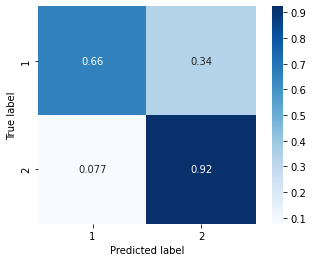

  0%|          | 0/3972 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

Validation Set
Accuracy: 0.8071500503524672

              precision    recall  f1-score   support

           0     0.7593    0.6073    0.6749      1309
           1     0.8243    0.9054    0.8629      2663

    accuracy                         0.8072      3972
   macro avg     0.7918    0.7564    0.7689      3972
weighted avg     0.8029    0.8072    0.8009      3972



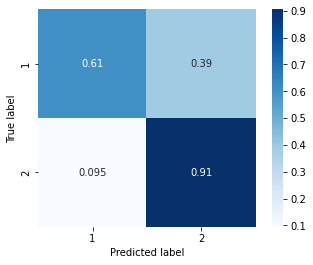

In [ ]:
evaluate_bert_model(model_bert_base_cased_128, model_name="bert_base_cased_128")



---


### **2.2.2 Cased Large BERT**


---



In [ ]:
model_bert_large_cased = \
ClassificationModel('bert',
                    'bert-large-cased',
                    args={"output_dir": "outputs_bert_large_cased/",
                          "best_model_dir": "outputs_bert_large_cased/best_model/",
                          "max_seq_length": 128,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 20000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 20000,
                          "save_model_every_epoch": False,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at 

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
model_bert_large_cased.train_model(test_df)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/580 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


(580, 0.5155891484227674)

In [ ]:
evaluate_bert_model(model_bert_large_cased, model_name="model_bert_large_cased")



---


### **2.2.3 RoBERTa**



---



In [ ]:
model_roberta_base_128 = \
ClassificationModel('roberta', 
                    'roberta-base',
                    args={"output_dir": "outputs_roberta_base/",
                          "best_model_dir": "outputs_roberta_base/best_model/",
                          "max_seq_length": 128,
                          "train_batch_size": 16,
                          "num_train_epochs": 1,
                          "logging_steps": 100,
                          "evaluate_during_training": False,
                          "evaluate_during_training_steps": 10000,
                          "evaluate_during_training_verbose": False,
                          "save_eval_checkpoints": False,
                          "save_steps": 10000,
                          "save_model_every_epoch": True,
                          "overwrite_output_dir": True,
                          "reprocess_input_data": False})

In [ ]:
model_roberta_base_128.train_model(train_df)

In [ ]:
evaluate_bert_model(model_roberta_base_128, model_name="model_roberta_base_128")